## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data = pd.read_csv("/content/Uber Drives - .csv")

In [11]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


## Checking missing data

In [4]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [8]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [9]:
data['START_DATE*'] = pd.to_datetime(data["START_DATE*"], format= '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data["END_DATE*"], format= '%m/%d/%Y %H:%M')


In [10]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [12]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data["START_DATE*"]:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data["HOUR"] = hour
data["DAY"] = day
data["DAY_OF_WEEK"] = dayofweek
data["MONTH"] = month
data["WEEK_DAY"] = weekday

In [14]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEK_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## Cateogories We Have

In [16]:
data["CATEGORY*"].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

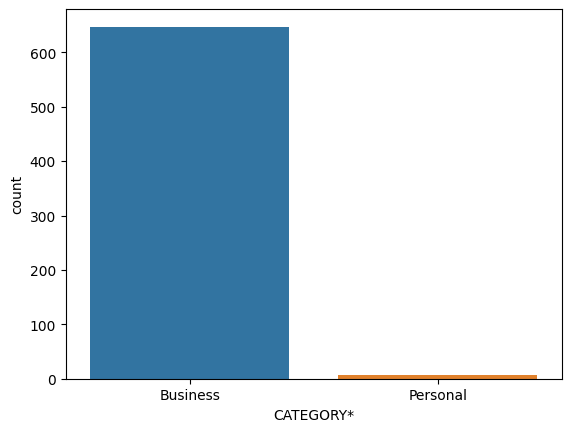

In [18]:
sns.countplot(x="CATEGORY*", data=data);

## How long people travel in uber

<Axes: ylabel='Frequency'>

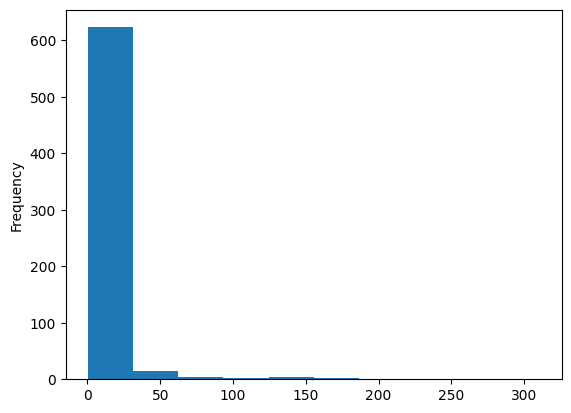

In [19]:
data["MILES*"].plot.hist()

## What hour do most people take uber to thier destination

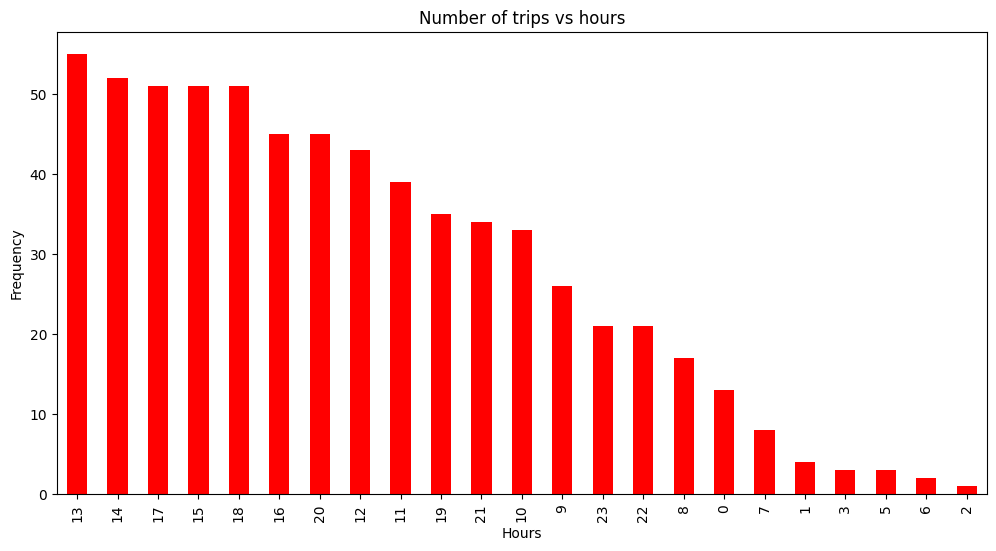

In [24]:
hours = data["START_DATE*"].dt.hour.value_counts()
hours.plot(kind ='bar', color='red', figsize=(12,6))

plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Number of trips vs hours");

 ## Check the Purpose of Trips

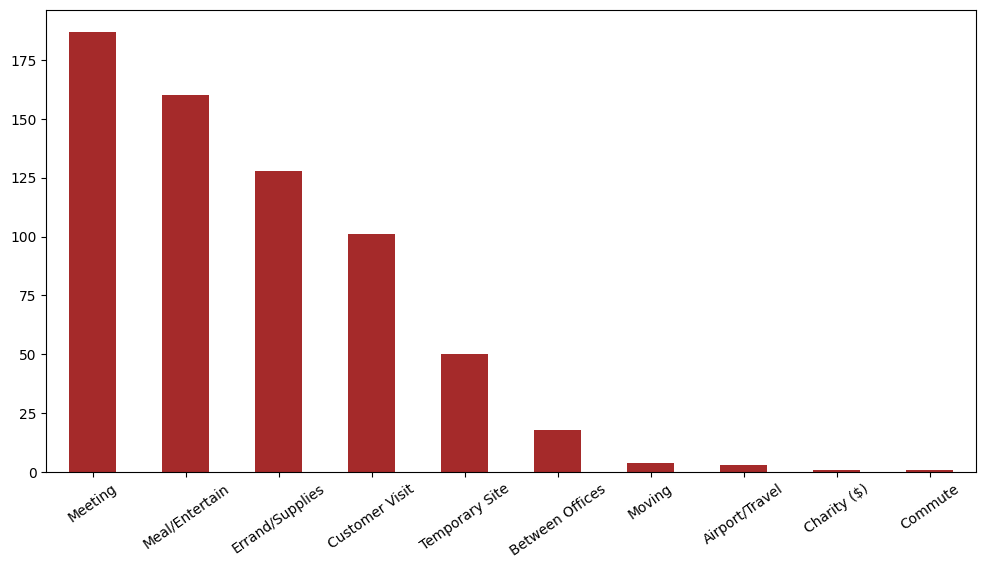

In [30]:
data["PURPOSE*"].value_counts().plot(kind="bar",figsize=(12,6), color="brown")
plt.xticks(rotation=35);

## Which day has the highest number of trips

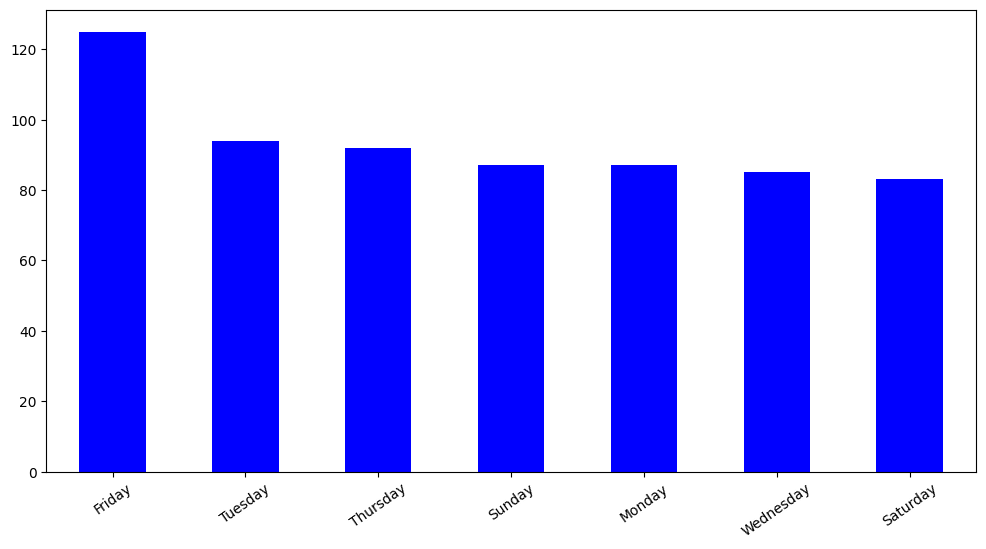

In [32]:
data["WEEK_DAY"].value_counts().plot(kind="bar",figsize=(12,6), color="blue")
plt.xticks(rotation=35);

## WHat are the numbers of trips per each day

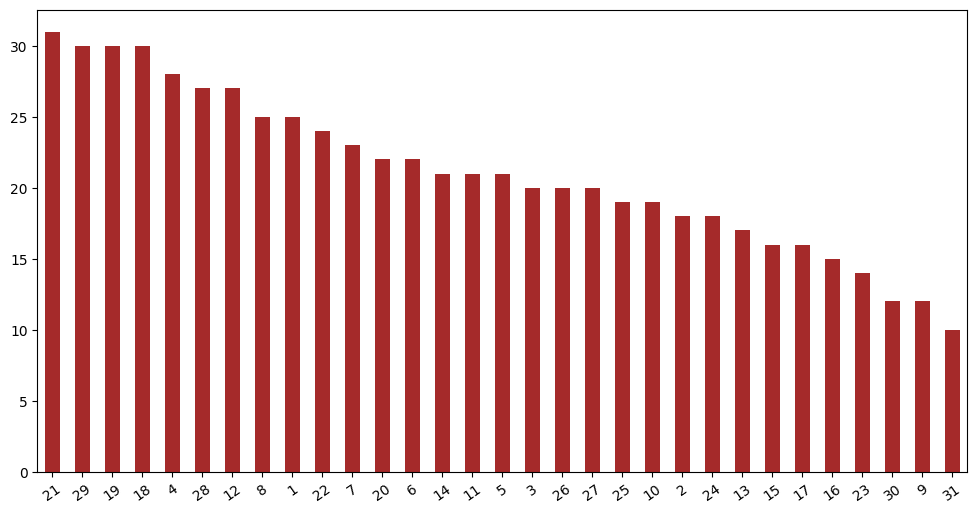

In [34]:
data["DAY"].value_counts().plot(kind="bar",figsize=(12,6), color="brown")
plt.xticks(rotation=35);

## What are the trips in the month

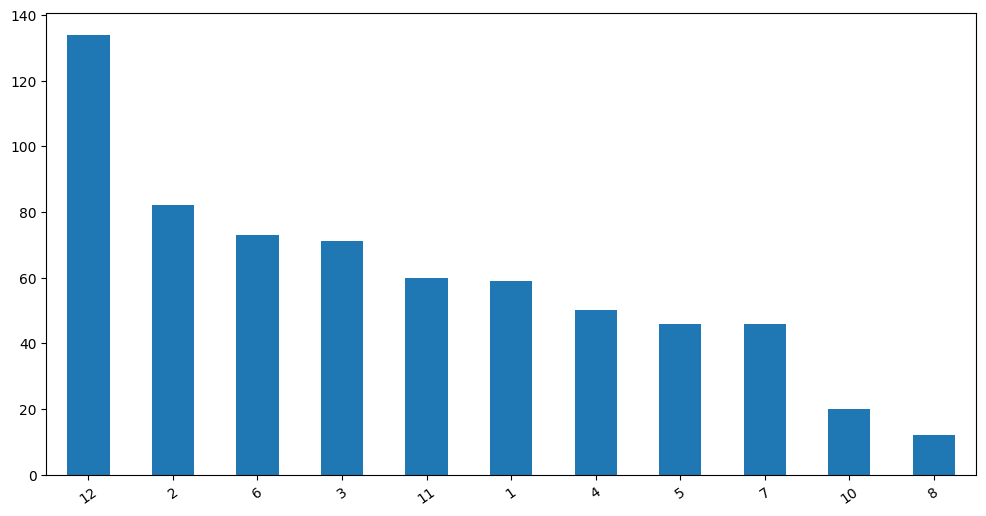

In [35]:
data["MONTH"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(rotation=35);

## The Starting points of trips, Where do People Start Boarding Thier trip from most?

<Axes: >

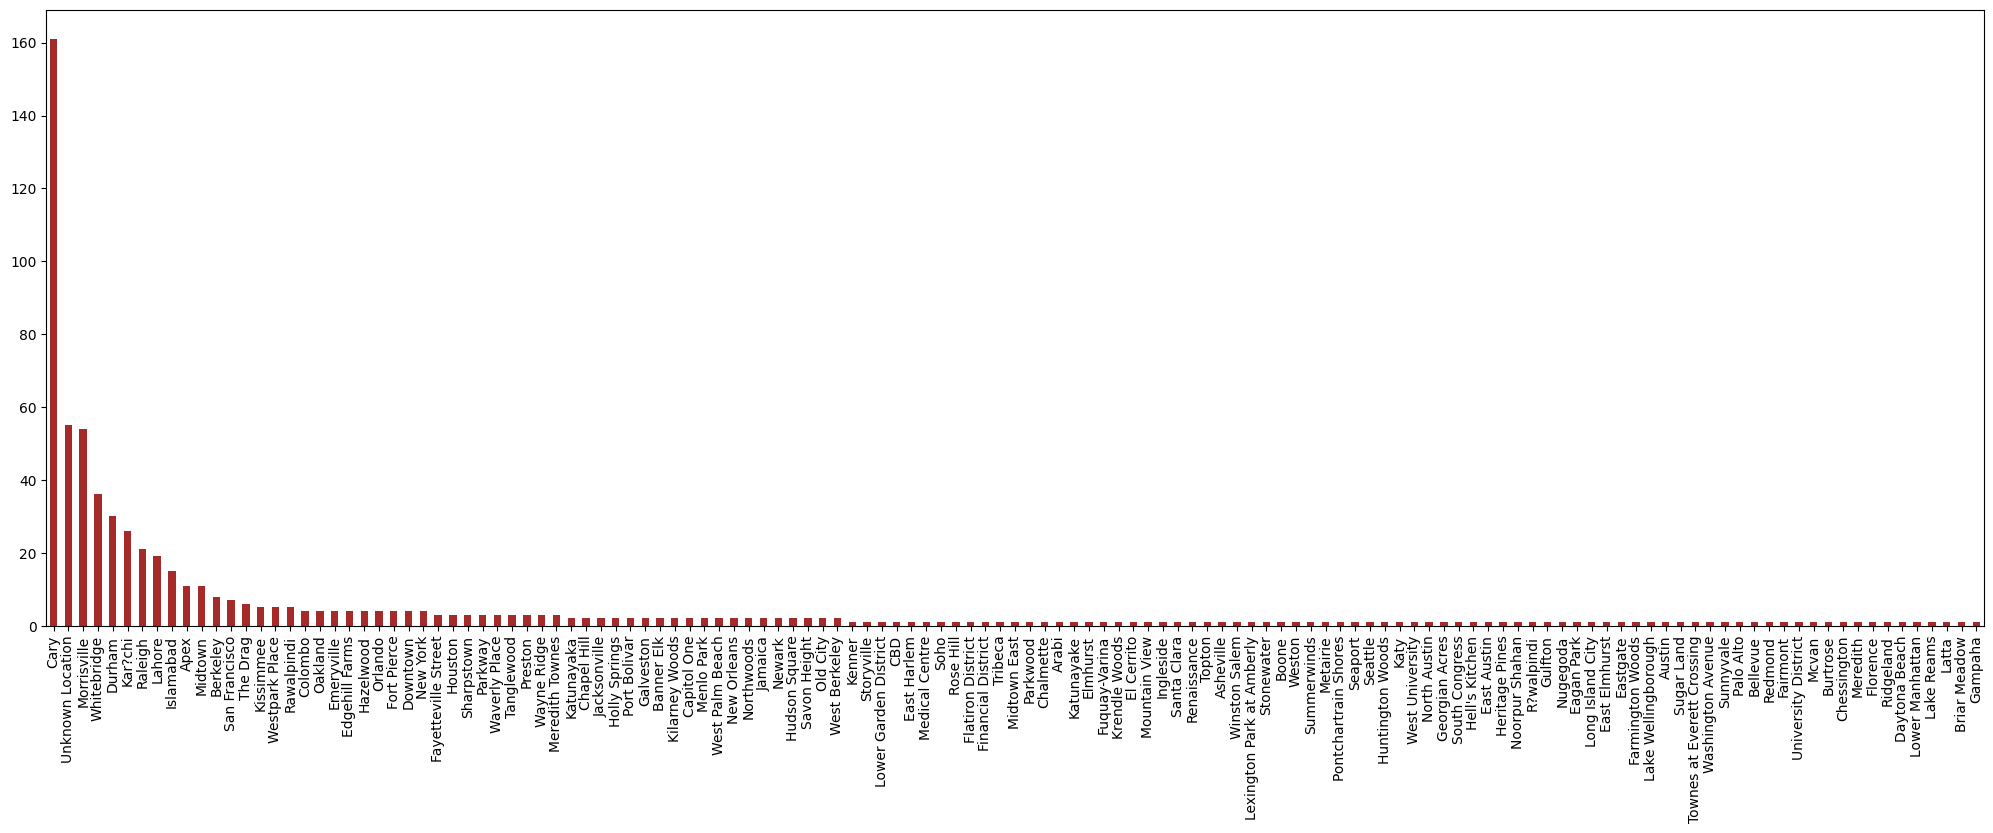

In [40]:
data["START*"].value_counts().plot(kind="bar",figsize=(25,8), color="brown")
# plt.xticks(rotation=35);